### 레버리지 상품에 장기투자하면 안 되는 이유

Volatility Tax로 인해 음의 복리 수익률을 얻기 때문
https://en.wikipedia.org/wiki/Volatility_tax

### 데이터를 통해 알아보기

In [1]:
# 라이브러리 설치
%pip install pandas-datareader
%pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 4.7 MB/s eta 0:00:00
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/3c/d2/11533f0bc47ff4d828a20cfb702f3453fe714bd5b475fcdc8cec6e6b7dcf/lxml-4.9.3-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e9/43/93ea65227c938a0a4a8925d7f054b050ea743044b887170da9eca210635a/yfinance-0.2.28-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 라이브러리 import
import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 기간 설정

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2023, 1, 1)
yf.pdr_override()

In [4]:
# SIVBQ == 실리콘밸리은행, TSLA == 테슬라
ticker = "SIVBQ"
df = pdr.get_data_yahoo(ticker, start, end)
#df = pdr.get_data_yahoo("TSLA", start, end)

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,235.889999,237.550003,233.350006,237.380005,237.380005,395968
2018-01-03,236.960007,238.340393,234.354996,237.669998,237.669998,341874
2018-01-04,239.570007,241.779999,238.179993,239.940002,239.940002,721871
2018-01-05,241.860001,244.434998,240.050003,243.850006,243.850006,402884
2018-01-08,243.889999,244.044998,241.160004,243.580002,243.580002,409217
...,...,...,...,...,...,...
2022-12-23,215.130005,216.970001,211.634995,216.850006,216.850006,332559
2022-12-27,216.399994,219.309998,210.330002,216.110001,216.110001,485233
2022-12-28,215.610001,217.809998,212.839996,216.449997,216.449997,480089


In [5]:
df_chg = df.pct_change().dropna()

In [6]:
df_chg

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-03,0.004536,0.003327,0.004307,0.001222,0.001222,-0.136612
2018-01-04,0.011015,0.014431,0.016321,0.009551,0.009551,1.111512
2018-01-05,0.009559,0.010981,0.007851,0.016296,0.016296,-0.441889
2018-01-08,0.008393,-0.001596,0.004624,-0.001107,-0.001107,0.015719
2018-01-09,0.007667,0.022148,0.015135,0.013589,0.013589,-0.268738
...,...,...,...,...,...,...
2022-12-23,0.006927,0.004584,0.020592,0.004866,0.004866,-0.591696
2022-12-27,0.005903,0.010785,-0.006166,-0.003413,-0.003413,0.459088
2022-12-28,-0.003651,-0.006840,0.011934,0.001573,0.001573,-0.010601


In [15]:
# 수정종가만 가져오기
close_chg = df_chg['Adj Close']

In [17]:
# 레버리지 적용 (현재는 -1 Inverse)
# leverage rate를 변경해보세요! (2, 3 등)
leverage_rate = -1
1+close_chg*(leverage_rate)

Date
2018-01-03    0.998778
2018-01-04    0.990449
2018-01-05    0.983704
2018-01-08    1.001107
2018-01-09    0.986411
                ...   
2022-12-23    0.995134
2022-12-27    1.003413
2022-12-28    0.998427
2022-12-29    0.916008
2022-12-30    1.019137
Name: Adj Close, Length: 1258, dtype: float64

In [20]:
# 초기 ETF 자산 1000으로 가정
leverage_path = np.array([1000 for i in range(len(df.Close)-1)]) * np.cumproduct((1+close_chg*(leverage_rate)))

In [21]:
leverage_path = np.append(1000, leverage_path)

Text(0.5, 1.0, 'AAPL Original Path')

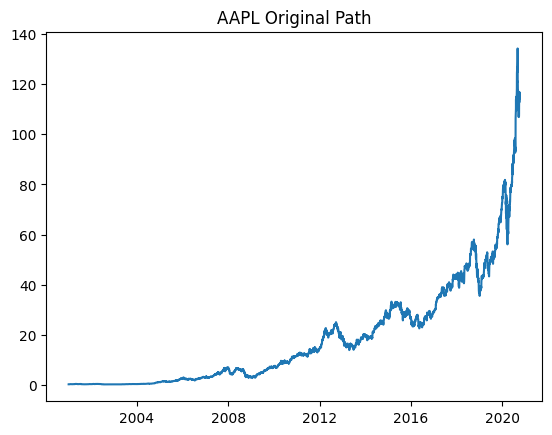

In [9]:
# 기초자산 가격 Path
plt.plot(df.Close)
plt.title(f'{ticker} Original Path')

Text(0.5, 1.0, 'SIVBQ -1X Leverage Path')

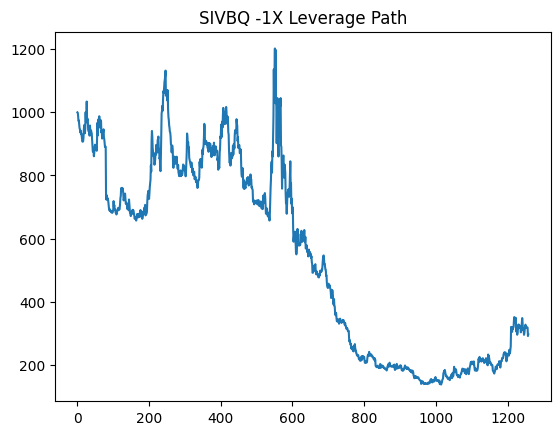

In [24]:
# ETF 가격 Path

plt.plot(leverage_path)
plt.title(f'{ticker} {leverage_rate}X Leverage Path')

In [25]:
print(f"no leverage 수익률은 {(df.Close[-1] - df.Close[0])/df.Close[0]*100}%, {leverage_rate}X 수익률은 {(leverage_path[-1] - leverage_path[0])/leverage_path[0] *100}% 입니다.")

no leverage 수익률은 -3.0499643374505108%, -1X 수익률은 -70.33680845793181% 입니다.


### 데이터 가정 후 Volatility Tax 확인

In [111]:
import pandas as pd

In [112]:
df = pd.DataFrame([100, 101]*20)

df.columns = ['Close']

In [113]:
df_chg = df.pct_change().dropna()
df_chg

,Close
1,0.010000
2,-0.009901
3,0.010000
4,-0.009901
5,0.010000
6,-0.009901
7,0.010000
8,-0.009901
9,0.010000
10,-0.009901


In [118]:
# leverage rate 설정
# 5나 10으로도 바꿔보세요!
leverage_rate = -1

In [119]:
leverage_path = np.array([100 for i in range(len(df.Close)-1)]) * np.cumproduct([1+df_chg*(leverage_rate)])
leverage_path = np.append(100, leverage_path)

Text(0.5, 1.0, 'Original Path')

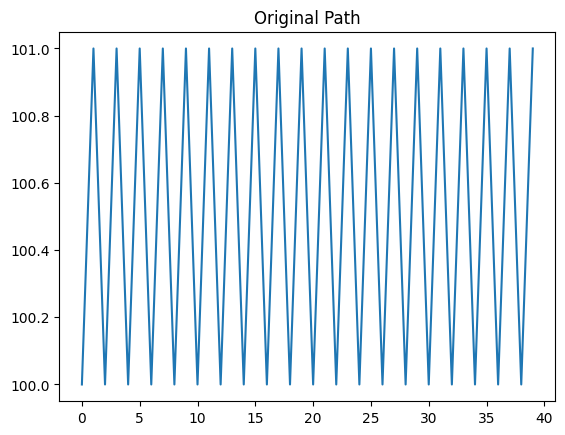

In [120]:
# 기초자산의 Price Path (가정)
plt.plot(df.Close)
plt.title("Original Path")

Text(0.5, 1.0, '-1X Path')

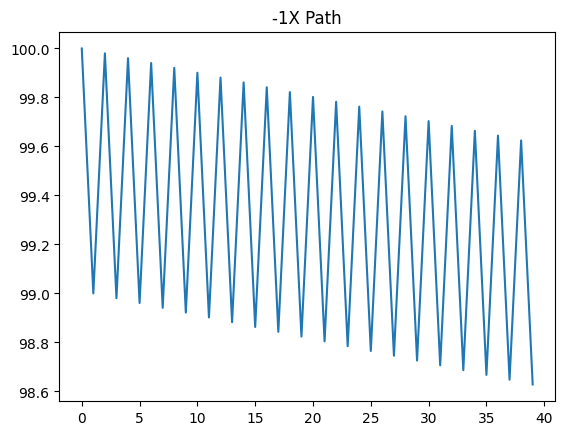

In [121]:
# 기초자산의 -1X 인버스 상품의 Price Path
# Volatility Tax

plt.plot(leverage_path)
plt.title(f"{leverage_rate}X Path")

In [122]:
leverage_path

array([100.        ,  99.        ,  99.98019802,  98.98039604,
        99.96039996,  98.96079596,  99.94060582,  98.94119976,
        99.9208156 ,  98.92160745,  99.9010293 ,  98.90201901,
        99.88124692,  98.88243445,  99.86146846,  98.86285377,
        99.84169391,  98.84327697,  99.82192328,  98.82370404,
        99.80215656,  98.80413499,  99.78239375,  98.78456982,
        99.76263487,  98.76500852,  99.74287989,  98.74545109,
        99.72312882,  98.72589753,  99.70338167,  98.70634785,
        99.68363842,  98.68680204,  99.66389909,  98.6672601 ,
        99.64416366,  98.64772203,  99.62443215,  98.62818783])

In [123]:
print(f"no leverage 수익률은 {(list(df.Close)[-1] - df.Close[0])/df.Close[0]*100}%, {leverage_rate}X 수익률은 {(leverage_path[-1] - leverage_path[0])/leverage_path[0] *100}% 입니다.")

no leverage 수익률은 1.0%, -1X 수익률은 -1.371812174539727% 입니다.


### Volatility Tax 조정

In [36]:
# Volatility Tax 계산
vol_drag = np.std(df_chg * leverage_rate)
vol_drag = float(vol_drag)**2
vol_drag

NameError: name 'df_chg' is not defined

In [151]:
# Volatility Tax 조정
adj_chg = df_chg *leverage_rate + vol_drag

In [155]:
# np cumproduct를 이용한 price path 생성
df = np.array([100 for i in range(len(adj_chg.Close))]) * np.cumproduct((1+adj_chg.Close))

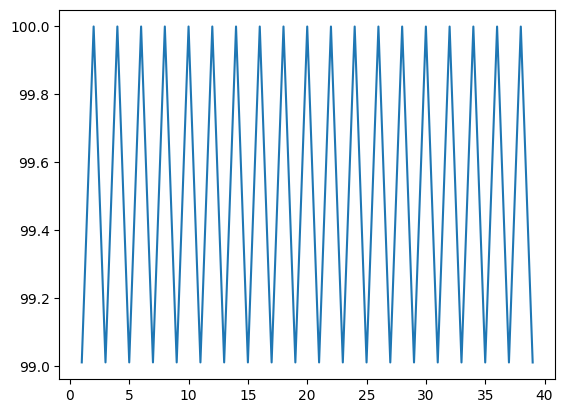

In [156]:
# Volatility Tax 조정 이후 인버스 상품 Price Path

plt.plot(df)

### 과제

1. yfinance 모듈(Yahoo Finance)을 이용하여, [2001-01-04 ~ 2020-10-4] 기간 삼성전자(005930.KS)의 4배 레버리지 상품의 Stock Price Path를 그리시오.

2. 해당 기간 삼성전자의 총 수익률과 4배 레버리지 상품의 수익률을 출력하시오

3. 해당 기간 삼성전자의 수익률의 역사적 변동성과 4배 레버리지 상품의 수익률의 역사적 변동성을 출력하시오


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL Stock Price Path')

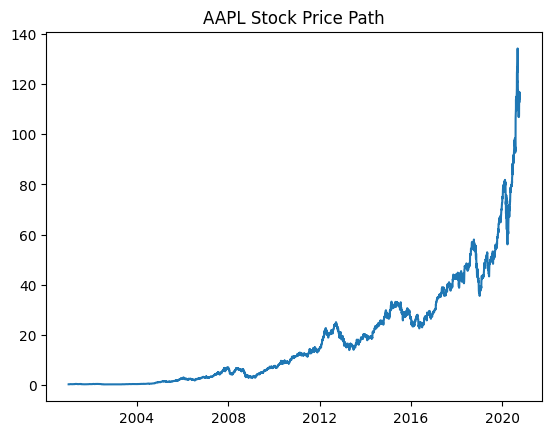

In [11]:
# 1번 문제 (셀을 늘려도 괜찮습니다)
%pip install pandas-datareader
%pip install yfinance

import datetime
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

start = datetime.datetime(2001, 1, 4)
end = datetime.datetime(2020, 10, 4)
yf.pdr_override()

ticker = "AAPL"
df = pdr.get_data_yahoo(ticker, start, end)
#df = pdr.get_data_yahoo("AAPL", start, end)

plt.plot(df.Close)
plt.title(f'{ticker} Stock Price Path')


In [32]:
# 2번 문제
leverage_rate = 4
print(f"total 수익률은 {(df.Close[4] - df.Close[0])/df.Close[0]*100}%, {leverage_rate}X 수익률은 {(leverage_path[4] - leverage_path[0])/leverage_path[0] *100}% 입니다.")

plt.plot(leverage_path)
plt.title(f"{leverage_rate}X Path")

leverage_path = np.array([100 for i in range(len(df.Close)4)]) * np.cumproduct([1+df_chg*(leverage_rate)])
leverage_path = np.append(100, leverage_path)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2960734461.py, line 8)

In [37]:
# 3번 문제
vol_drag = np.std(df_chg * leverage_rate)
vol_drag = float(vol_drag)**2
vol_drag
plt.plot(leverage_path)
plt.title(f"{leverage_rate}X Path")

NameError: name 'df_chg' is not defined